In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
df = pd.read_csv('titanic-data.csv')
df.info()

Populating the interactive namespace from numpy and matplotlib
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It seems that There are some row lacking of age, cabin and embarked. 

In [5]:
#To remove the rows containing null values, for statistics which need age information or cabin information.
a = df.dropna()

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As the variables I care about have no missing values, I will use all the data without any dropping. 

## One variable exploration
Here I would like to perform an one-variable exploration on the tickes fare, grouped by classes.

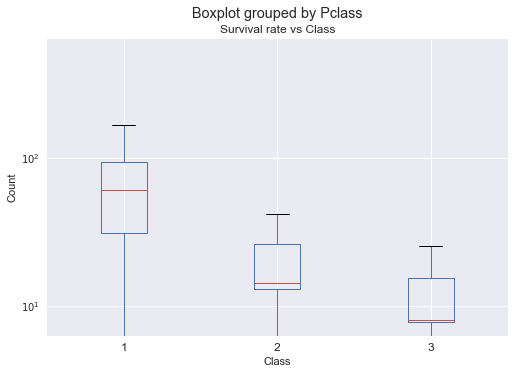

In [62]:
df.boxplot(column=['Fare'],by = ['Pclass']).set_yscale('log')
pd.DataFrame(df.groupby( ['Pclass'])['Fare'].describe().loc[:,['mean','std']])
plt.xlabel("Class")
plt.ylabel('Count')
plt.title("Survival rate vs Class")

## Two variables exploration

Here I would like to see the correlation between two variables.

The first one is between survivial rate and class level.


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


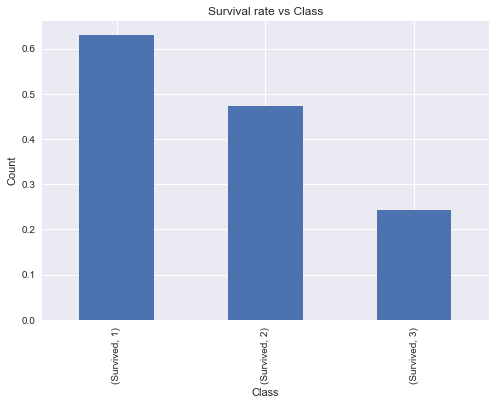

In [61]:
ax = df.groupby([ 'Pclass'])[['Survived']].mean().unstack().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel('Survival Rate')
plt.title("Survival rate vs Class")
df.groupby(['Pclass' ])[['Survived']].mean()

## Multi variable exploration¶

I couldn't help but wonder if women have more chances to survive, since they were protected more by men, so the second relation I would like to explore is among survive rate, class and gender.

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

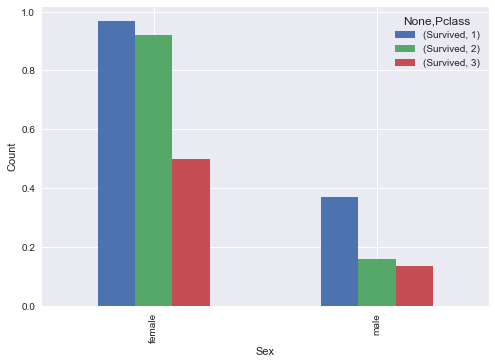

In [46]:
df.groupby(['Sex','Pclass'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Count')
df.groupby(['Sex','Pclass'])[['Survived']].mean()

My assumption was verified that much more women than men were saved.

The 2nd assumption of me is that parent with kids could face more challenge of survial, as kids could be great burdens during emergency.

Survived
Sex    Parch          
female 0      0.788660
       1      0.766667
       2      0.612245
       3      0.750000
       4      0.000000
       5      0.250000
       6      0.000000
male   0      0.165289
       1      0.327586
       2      0.322581
       3      0.000000
       4      0.000000
       5      0.000000

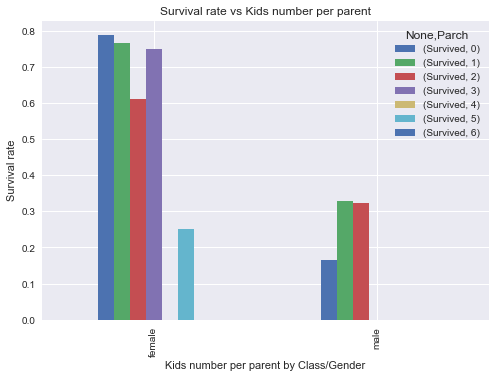

In [63]:
df.groupby(['Sex','Parch'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Count')
plt.xlabel("Kids number per parent by Class/Gender")
plt.ylabel('Survival rate')
plt.title("Survival rate vs Kids number per parent")

df.groupby(['Sex','Parch'])[['Survived']].mean()

Again, this verified my assumption that people with more kids has less chance to survive.
## Limitations of this data analysis

1) There are some missing values in this data set, so this data analysis might be affected by that.
2) I chose to omit the rows with missing information, and this shrink the size of this data sample.
3) We could find some intuitive correlation with the above data analysis. However, the statistical tesing could further verify such conclusions here.
